In [ ]:
# gerardo Herrera... random forest (25 arboles) con 28k instacias de normal y recovering y 24 sensores
# comparacion de los diferentes por diferentes covariancia

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
pd.options.display.precision = 15

import time
# Libraries
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

!pip install lightgbm
!pip install catboost

import datetime
import lightgbm as lgb
from scipy import stats
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
import os
import lightgbm as lgb
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn import metrics
from sklearn import linear_model
from tqdm import tqdm_notebook
from catboost import CatBoostClassifier



     |████████████████████████████████| 65.8MB 58kB/s 


In [ ]:
# sensor = pd.read_csv('../input/sensor.csv')
# sensor = pd.read_csv('../input/vombas/sensor_procesado.csv')
#sensor = pd.read_csv('dataset_sensor_procesado.csv')
#sensor = pd.read_csv('../input/bombas-sensores-conocidos/sensor2.csv')
#sensor = pd.read_csv('../input/28k-s24-balan-vombas/sensor2-ordenado_status_sin_broken_balanced_28k.csv')
#sensor.drop(['Unnamed: 0'], axis=1, inplace=True)

sensor = pd.read_csv('/content/drive/My Drive/datasets/sensor2-ordenado_status_sin_broken_balanced_28k.csv')

In [ ]:
sensor.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_11,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_25,sensor_26,sensor_27,sensor_28,sensor_30,sensor_31,sensor_44,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.092010000000002,53.211799999999997,46.310760000000002,634375.000000000000000,47.524220000000000,419.574700000000007,461.878100000000018,466.328399999999988,2.565284,665.399300000000039,398.986199999999997,880.000099999999975,498.892600000000016,975.940900000000056,741.715100000000007,848.070799999999963,429.037699999999973,788.498699999999985,701.388900000000035,924.999900000000025,43.692129999999999,NaN,177.951400000000007,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.092010000000002,53.211799999999997,46.310760000000002,634375.000000000000000,47.524220000000000,419.574700000000007,461.878100000000018,466.328399999999988,2.565284,665.399300000000039,398.986199999999997,880.000099999999975,498.892600000000016,975.940900000000056,741.715100000000007,848.070799999999963,429.037699999999973,804.123999999999796,682.870400000000018,965.624900000000025,44.560180000000003,NaN,178.530100000000004,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.352429999999998,53.211799999999997,46.397570000000002,638.888900000000035,48.177230000000002,420848.000000000000000,462.779800000000023,459.636399999999981,2.500062,666.223399999999970,399.941800000000001,880.423700000000053,501.361699999999985,982.734199999999987,740.803099999999972,849.899700000000053,454.238999999999976,790.801600000000008,690.740699999999947,898.437400000000025,46.006940000000000,NaN,177662.000000000000000,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.092010000000002,53.168399999999998,46.397567749023402,628125.000000000000000,48.656070000000000,420.749399999999980,462898.000000000000000,460.885800000000017,2.509521,666.011399999999981,399.104600000000005,878.891700000000014,499043.000000000000000,977752.000000000000000,739.272199999999998,847.757899999999950,474.873100000000022,792.879099999999994,686.111099999999965,956.249900000000025,47.743060000000000,NaN,175.057899999999989,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.135410000000000,53.211799999999997,46.397567749023402,636.458300000000008,49.062980000000003,419.892600000000016,461.490599999999972,468.220599999999990,2.604785,663.211099999999988,400.542599999999993,882.587400000000002,498.538299999999992,979.575500000000034,737.603299999999990,846.918199999999956,408.815899999999999,786064.000000000000000,693.055500000000052,935.937400000000025,49.189820000000012,NaN,173.321799999999996,NORMAL


In [ ]:
#sensor.drop(['sensor_15'], axis=1, inplace=True)
sensor.drop(['timestamp'], axis=1, inplace=True)

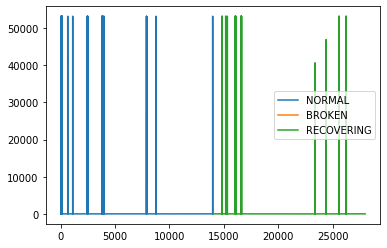

In [ ]:
# lineA DE LOS 22K INSTANCIAS
plt.plot(sensor.loc[sensor['machine_status'] == 'NORMAL', 'sensor_02'], label='NORMAL')
plt.plot(sensor.loc[sensor['machine_status'] == 'BROKEN', 'sensor_02'], label='BROKEN')
plt.plot(sensor.loc[sensor['machine_status'] == 'RECOVERING', 'sensor_02'], label='RECOVERING')
plt.legend()

In [ ]:
cleanup_nums = {"machine_status":     {"NORMAL": 0, "RECOVERING": 1,"BROKEN": 2}}

In [ ]:
sensor.replace(cleanup_nums, inplace=True)
sensor.head(30)

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_11,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_25,sensor_26,sensor_27,sensor_28,sensor_30,sensor_31,sensor_44,sensor_50,sensor_51,machine_status
0,0,2.465394,47.092010000000002,53.211799999999997,46.310760000000002,634375.000000000000000,47.524220000000000,419.574700000000007,461.878100000000018,466.328399999999988,2.565284,665.399300000000039,398.986199999999997,880.000099999999975,498.892600000000016,975.940900000000056,741.715100000000007,848.070799999999963,429.037699999999973,788.498699999999985,701.388900000000035,924.999900000000025,43.692129999999999,NaN,177.951400000000007,0
1,1,2.465394,47.092010000000002,53.211799999999997,46.310760000000002,634375.000000000000000,47.524220000000000,419.574700000000007,461.878100000000018,466.328399999999988,2.565284,665.399300000000039,398.986199999999997,880.000099999999975,498.892600000000016,975.940900000000056,741.715100000000007,848.070799999999963,429.037699999999973,804.123999999999796,682.870400000000018,965.624900000000025,44.560180000000003,NaN,178.530100000000004,0
2,2,2.444734,47.352429999999998,53.211799999999997,46.397570000000002,638.888900000000035,48.177230000000002,420848.000000000000000,462.779800000000023,459.636399999999981,2.500062,666.223399999999970,399.941800000000001,880.423700000000053,501.361699999999985,982.734199999999987,740.803099999999972,849.899700000000053,454.238999999999976,790.801600000000008,690.740699999999947,898.437400000000025,46.006940000000000,NaN,177662.000000000000000,0
3,3,2.460474,47.092010000000002,53.168399999999998,46.397567749023402,628125.000000000000000,48.656070000000000,420.749399999999980,462898.000000000000000,460.885800000000017,2.509521,666.011399999999981,399.104600000000005,878.891700000000014,499043.000000000000000,977752.000000000000000,739.272199999999998,847.757899999999950,474.873100000000022,792.879099999999994,686.111099999999965,956.249900000000025,47.743060000000000,NaN,175.057899999999989,0
4,4,2.445718,47.135410000000000,53.211799999999997,46.397567749023402,636.458300000000008,49.062980000000003,419.892600000000016,461.490599999999972,468.220599999999990,2.604785,663.211099999999988,400.542599999999993,882.587400000000002,498.538299999999992,979.575500000000034,737.603299999999990,846.918199999999956,408.815899999999999,786064.000000000000000,693.055500000000052,935.937400000000025,49.189820000000012,NaN,173.321799999999996,0
5,5,2.453588,47.092010000000002,53.168399999999998,46.397567749023402,637.615699999999947,49.370510000000003,418.904899999999998,461.894799999999975,461.928899999999999,2.507935,663.496200000000044,398.642800000000022,872.497299999999996,498.406400000000019,974.684700000000021,739.203600000000051,846.461699999999951,429.694500000000005,794.577400000000011,696.759300000000053,977.604100000000017,50.636569999999999,NaN,172.743099999999998,0
6,6,2.455556,47.048609999999996,53.168399810790994,46.397567749023402,633.333300000000008,49.571460000000002,420.332400000000007,464.240200000000016,467.514599999999973,2.598702,667.475099999999998,401.184700000000021,882.716400000000021,500.494399999999985,981.290799999999990,740.951699999999960,853.964699999999993,458.362300000000005,800.564200000000028,686.111099999999965,953.124900000000025,51.793979999999998,NaN,171.296300000000002,0
7,7,2.449653,47.135410000000000,53.168399810790994,46.397567749023402,630.671299999999974,49.327320000000000,417.552000000000021,462.456299999999999,463.893599999999992,2.533115,662.996700000000033,395.294600000000003,864.610300000000052,496.421800000000019,966.209100000000035,741.459299999999985,834.623299999999972,476.126199999999983,785.887899999999945,664.814799999999991,919.270800000000008,52.662040000000012,NaN,169.270800000000008,0
8,8,2.463426,47.092010000000002,53.168399810790994,46.397567749023402,631.944399999999973,50.287950000000002,422.077699999999993,463.498800000000017,461546.000000

In [ ]:
for col in sensor.columns[1:-1]:
    sensor[col] = sensor[col].fillna(sensor[col].mean())

In [ ]:
# bosque aleatorio

In [ ]:
sensor.fillna(sensor.mean(), inplace=True)

In [ ]:
sensor.head()

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_11,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_25,sensor_26,sensor_27,sensor_28,sensor_30,sensor_31,sensor_44,sensor_50,sensor_51,machine_status
0,0,2.465394,47.092010000000002,53.211799999999997,46.310760000000002,634375.000000000000000,47.524220000000000,419.574700000000007,461.878100000000018,466.328399999999988,2.565284,665.399300000000039,398.986199999999997,880.000099999999975,498.892600000000016,975.940900000000056,741.715100000000007,848.070799999999963,429.037699999999973,788.498699999999985,701.388900000000035,924.999900000000025,43.692129999999999,481.174107169096658,177.951400000000007,0
1,1,2.465394,47.092010000000002,53.211799999999997,46.310760000000002,634375.000000000000000,47.524220000000000,419.574700000000007,461.878100000000018,466.328399999999988,2.565284,665.399300000000039,398.986199999999997,880.000099999999975,498.892600000000016,975.940900000000056,741.715100000000007,848.070799999999963,429.037699999999973,804.123999999999796,682.870400000000018,965.624900000000025,44.560180000000003,481.174107169096658,178.530100000000004,0
2,2,2.444734,47.352429999999998,53.211799999999997,46.397570000000002,638.888900000000035,48.177230000000002,420848.000000000000000,462.779800000000023,459.636399999999981,2.500062,666.223399999999970,399.941800000000001,880.423700000000053,501.361699999999985,982.734199999999987,740.803099999999972,849.899700000000053,454.238999999999976,790.801600000000008,690.740699999999947,898.437400000000025,46.006940000000000,481.174107169096658,177662.000000000000000,0
3,3,2.460474,47.092010000000002,53.168399999999998,46.397567749023402,628125.000000000000000,48.656070000000000,420.749399999999980,462898.000000000000000,460.885800000000017,2.509521,666.011399999999981,399.104600000000005,878.891700000000014,499043.000000000000000,977752.000000000000000,739.272199999999998,847.757899999999950,474.873100000000022,792.879099999999994,686.111099999999965,956.249900000000025,47.743060000000000,481.174107169096658,175.057899999999989,0
4,4,2.445718,47.135410000000000,53.211799999999997,46.397567749023402,636.458300000000008,49.062980000000003,419.892600000000016,461.490599999999972,468.220599999999990,2.604785,663.211099999999988,400.542599999999993,882.587400000000002,498.538299999999992,979.575500000000034,737.603299999999990,846.918199999999956,408.815899999999999,786064.000000000000000,693.055500000000052,935.937400000000025,49.189820000000012,481.174107169096658,173.321799999999996,0


In [ ]:
print(sensor.shape)


(28002, 26)


In [ ]:
# Encontrar características importantes en Scikit-learn

# from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
#clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
#clf.fit(X_train,y_train)

In [ ]:
# no correr
#import pandas as pd
#feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
#feature_imp = pd.Series(clf.feature_importances_,index=sensor.columns[19:27]).sort_values(ascending=False)
#print(feature_imp)

#Visualización
#import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline
# Creating a bar plot
#sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
#plt.xlabel('Feature Importance Score')
#plt.ylabel('Features')
#plt.title("Visualizing Important Features")
#plt.legend()
#plt.show()

In [ ]:
# n_estimators=25
#X=sensor[['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03','sensor_04', 'sensor_11', 'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20','sensor_21', 'sensor_22', 'sensor_23', 'sensor_25', 'sensor_26','sensor_27', 'sensor_28', 'sensor_30', 'sensor_31', 'sensor_44','sensor_50', 'sensor_51']]  # Features
X=sensor[['sensor_50', 'sensor_44', 'sensor_28', 'sensor_31','sensor_26', 'sensor_25', 'sensor_51', 'sensor_27', 'sensor_19', 'sensor_20']] 
# https://www.datacamp.com/community/tutorials/python-rename-column?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=278443377092&utm_targetid=aud-392016246653:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9069516&gclid=CjwKCAiA7939BRBMEiwA-hX5J9ahnIo98hFnsAWJ83wwKKuyNQ7l8e05mSusSetmDCglFWTBu0ctXhoCPpgQAvD_BwE
#y=sensor['target']  # Labels
X= X.rename(columns = {'sensor_50': 's50', 'sensor_44': 's44', 'sensor_28': 's28', 'sensor_31': 's31', 'sensor_26': 's26', 'sensor_25': 's25', 'sensor_51': 's51', 'sensor_27': 's27', 'sensor_19': 's19', 'sensor_20': 's20'}, inplace = False)
y=sensor['machine_status']  # Labels

# Split dataset into training set and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test


from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=25)

start = time.time()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

stop = time.time()
print(f"Training time: {stop - start}s")

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#predicciones del item 17156 q es 1
#clf.predict([[0.0,53.55902,52.77777,43.402774810790994,204.72509765625,3.7302410000000004,404.9974,450.2004,454.0266,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

Training time: 0.47502899169921875s
Accuracy: 1.0


In [ ]:
#predicciones
#clf.predict([[0.0,53.55902,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])


In [ ]:
#predicciones
#clf.predict([[0.0,53.55902,52.77777,43.402774810790994,204.72509765625,3.7302410000000004,404.9974,450.2004,454.0266,2.4481040000000003,651.1287,0,0,0,0,0,0,0,0,0,0,0,0,0]])

In [ ]:
# Extract single tree
estimator = clf.estimators_[5]

In [ ]:
#from sklearn.tree import export_graphviz
# Export as dot file
#export_graphviz(estimator, out_file='tree.dot', 
#                feature_names = ['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03','sensor_04', 'sensor_11', 'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20','sensor_21', 'sensor_22', 'sensor_23', 'sensor_25', 'sensor_26','sensor_27', 'sensor_28', 'sensor_30', 'sensor_31', 'sensor_44','sensor_50', 'sensor_51'],
#                class_names = [ 'machine_status'],
 #               rounded = True, proportion = False, 
 #               precision = 2, filled = True)

In [ ]:
# validacion cruzada
# https://jamesrledoux.com/code/k_fold_cross_validation

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
start1 = time.time()
model = RandomForestClassifier(random_state=1)
cv = cross_validate(model, X, y, cv=10)
print(cv['test_score'])
print(cv['test_score'].mean())
stop1 = time.time()
print(f"Training time: {stop1 - start1}s")

[0.99892895 0.99964298 1.         1.         1.         1.
 1.         1.         1.         0.93107143]
0.9929643367164788
Training time: 22.235894918441772s


In [ ]:
#https://stackoverflow.com/questions/20662023/save-python-random-forest-model-to-file

[[2822    0]
 [   0 2779]]
[1.         0.99964298 1.         1.         0.99857143 1.
 1.         1.         1.         0.99928571]
0.9997500127505482
Training time: 5.762657165527344s
[[2822    0]
 [   0 2779]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2822
           1       1.00      1.00      1.00      2779

    accuracy                           1.00      5601
   macro avg       1.00      1.00      1.00      5601
weighted avg       1.00      1.00      1.00      5601



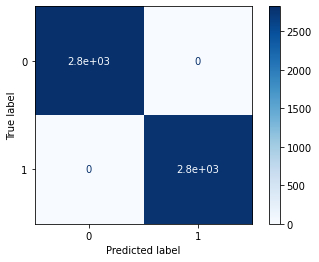

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix

start1 = time.time()
#model = RandomForestClassifier(random_state=1)
model = RandomForestClassifier(n_estimators=25)

cv = cross_validate(model, X, y, cv=10)
print(confusion_matrix(y_test,y_pred))
print(cv['test_score'])
print(cv['test_score'].mean())
stop1 = time.time()
print(f"Training time: {stop1 - start1}s")

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#plot_confusion_matrix(clf, X_test, y_test)  
# plot_confusion_matrix(clf, X_test, y_test)  
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  

plt.show()

[[2822    0]
 [   0 2779]]
precision_macro_score:
[1.         0.99964311 1.         1.         1.         1.
 1.         1.         1.         0.85361752]
0.9853260627811086
test_score:
[1.         0.99964298 1.         1.         1.         1.
 1.         1.         1.         0.93428571]
0.9933928698934054
recall:
[0.99571429 0.99928622 1.         1.         1.         1.
 1.         1.         1.         0.99857143]
0.9993571938411339
f1score:
[0.99785254 0.99964298 1.         1.         1.         1.
 1.         1.         1.         0.99785867]
0.999535419818484
Training time: 21.93630623817444s
[[2822    0]
 [   0 2779]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2822
           1       1.00      1.00      1.00      2779

    accuracy                           1.00      5601
   macro avg       1.00      1.00      1.00      5601
weighted avg       1.00      1.00      1.00      5601



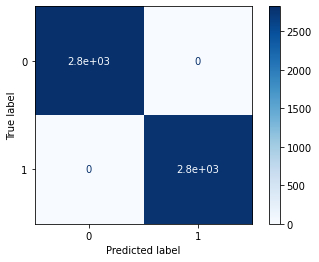

In [ ]:
# version with multi scroring
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix

start1 = time.time()
#model = RandomForestClassifier(random_state=1)
model = RandomForestClassifier(n_estimators=25)

cv = cross_validate(model, X, y, cv=10)
#recall_score=cross_validation.cross_val_score(clf, X,y, cv=10, scoring ='recall')
#recall_score=cross_val_score(model, X,y, cv=10, scoring ='recall')
f1=cross_validate(model, X,y, cv=10, scoring ='f1')
recall_score=cross_validate(model, X,y, cv=10, scoring ='recall')
pre_score=cross_validate(model, X,y, cv=10, scoring ='precision_macro')
print(confusion_matrix(y_test,y_pred))
print(f"precision_macro_score:")
print(pre_score['test_score'])
print(pre_score['test_score'].mean())
print(f"test_score:")
print(cv['test_score'])
print(cv['test_score'].mean())
print(f"recall:")
print(recall_score['test_score'])
print(recall_score['test_score'].mean())
print(f"f1score:")
print(f1['test_score'])
print(f1['test_score'].mean())
stop1 = time.time()
print(f"Training time: {stop1 - start1}s")

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#plot_confusion_matrix(clf, X_test, y_test)  
# plot_confusion_matrix(clf, X_test, y_test)  
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  

plt.show()

[[2822    0]
 [   0 2779]]
multi_metric_scores:
{'fit_time': array([0.56579471, 0.54468942, 0.55483556, 0.56191278, 0.57669592,
       0.53374624, 0.58592129, 0.55244994, 0.55253959, 0.50533867]), 'score_time': array([0.01155686, 0.01100016, 0.0113368 , 0.01096654, 0.01208901,
       0.01252532, 0.01103711, 0.01109099, 0.01137662, 0.01111388]), 'test_accuracy': array([0.99892895, 0.99964298, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.92285714]), 'test_f1': array([0.99892742, 0.99964298, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.92828685]), 'test_recall': array([0.99785714, 0.99928622, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99857143]), 'test_precision': array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.86724566])}
Training time: 11.806705236434937s
[[2822    0]


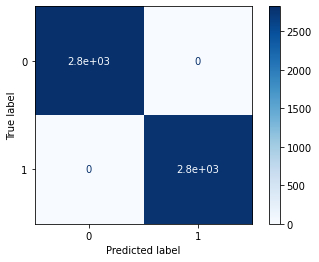

accuracy:
[0.99892895 0.99964298 1.         1.         1.         1.
 1.         1.         1.         0.92285714]
0.9921429081450504
precision:
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.86724566]
0.9867245657568239
recall:
[0.99785714 0.99928622 1.         1.         1.         1.
 1.         1.         1.         0.99857143]
0.9995714795554196
f1:
[0.99892742 0.99964298 1.         1.         1.         1.
 1.         1.         1.         0.92828685]
0.9926857259476094
--------
matriz de confusion:
TN=2822, FP=0 
FN=0, TP=2779 
--------
matriz de confusion %:
TN=50.383860024995535, FP=0.0 
FN=0.0, TP=49.616139975004465 
--------
accuracy1=1.0
--------
reca1=1.0
--------
pre1=1.0
--------
f1score=1.0


In [ ]:
# version with multi scroring mejorada
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix

start1 = time.time()
#model = RandomForestClassifier(random_state=1)
model = RandomForestClassifier(n_estimators=25)

#GH
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
#GH

cv = cross_validate(model, X, y, cv=10)
#recall_score=cross_validation.cross_val_score(clf, X,y, cv=10, scoring ='recall')
#recall_score=cross_val_score(model, X,y, cv=10, scoring ='recall')

#scoring = ['neg_mean_absolute_error','r2']

scores=cross_validate(model, X,y, cv=10, scoring = ['accuracy','f1','recall','precision'],return_train_score=False)
#recall_score=cross_validate(model, X,y, cv=10, scoring ='recall')
#pre_score=cross_validate(model, X,y, cv=10, scoring ='precision_macro')
print(confusion_matrix(y_test,y_pred))

print(f"multi_metric_scores:")
#print(scores['test_score'])
print(scores)
#print(scores['test_score'].mean())

#print(scores.mean())

#print(f"precision_macro_score:")
#print(pre_score['test_score'])
#print(pre_score['test_score'].mean())

#print(f"test_score:")
#print(cv['test_score'])
#print(cv['test_score'].mean())

#print(f"recall:")
#print(recall_score['test_score'])
#print(recall_score['test_score'].mean())

#print(f"f1score:")
#print(f1['test_score'])
#print(f1['test_score'].mean())

stop1 = time.time()
print(f"Training time: {stop1 - start1}s")

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#plot_confusion_matrix(clf, X_test, y_test)  
# plot_confusion_matrix(clf, X_test, y_test)  
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  

plt.show()

gh4 = scores.get("test_accuracy")

print(f"accuracy:")
print(gh4)
print(gh4.mean())

gh3 = scores.get("test_precision")

print(f"precision:")
print(gh3)
print(gh3.mean())

gh = scores.get("test_recall")

print(f"recall:")
print(gh)
print(gh.mean())

gh2 = scores.get("test_f1")

print(f"f1:")
print(gh2)
print(gh2.mean())

CM = confusion_matrix(y_test, y_pred)
print(f"--------")
print(f"matriz de confusion:")
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
print(f"TN={TN}, FP={FP} ")
print(f"FN={FN}, TP={TP} ")

print(f"--------")
print(f"matriz de confusion %:")
total1=(TN+TP+FN+FP)

print(f"TN={100*TN/total1}, FP={100*FP/total1} ")
print(f"FN={100*FN/total1}, TP={100*TP/total1} ")

print(f"--------")
acc1=(TN+TP)/(TN+TP+FN+FP)
print(f"accuracy1={acc1}")

print(f"--------")
re1=(TP)/(TP+FN)
print(f"reca1={re1}")

print(f"--------")
pre1=(TP)/(TP+FP)
print(f"pre1={pre1}")

print(f"--------")
f1s1=(2*pre1*re1)/(pre1+re1)
print(f"f1score={f1s1}")

In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier
# create RF

In [ ]:
# save
joblib.dump(clf, "my_random_forest.joblib")

['my_random_forest.joblib']

In [ ]:
# load
loaded_rf = joblib.load("my_random_forest.joblib")

In [ ]:
#predicciones
#clf.predict([[0.0,53.55902,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
#predicciones
#loaded_rf.predict([[0.0,53.55902,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

In [ ]:
# 1 es recovering
#loaded_rf.predict([[0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

In [ ]:
# 0 es recovering
#loaded_rf.predict([[2.465394,47.092009999999995,53.2118,46.310759999999995,634375,47.52422,419.5747,461.8781,466.3284,2.565284,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

In [ ]:
# 2 es broken
#loaded_rf.predict([[2.258796,47.26563,52.73437,43.4461784362793,200.11573791503898,43.62322,420.3359,463.0843,462.6495,2.539193,665.5446,399166,880.9252,498.6224,997.6364,719.8438,867.5176,551.6367,1154405,655.5555,1024479,35.01157,246.2384,257.5231]])

No handles with labels found to put in legend.


s50    0.424751004788311
s28    0.257588094073515
s25    0.168535262545393
s31    0.051044133401583
s44    0.044079456942063
s26    0.043627367930263
s27    0.006666899019197
s51    0.003074328721534
s19    0.000524926605115
s20    0.000108525973026
dtype: float64


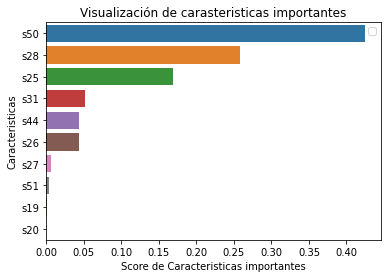

<Figure size 432x288 with 0 Axes>

In [ ]:

import pandas as pd
#feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
#feature_imp = pd.Series(clf.feature_importances_,index=X.columns[1:8]).sort_values(ascending=False)
#feature_imp = pd.Series(clf.feature_importances_,index=X.columns[0:24]).sort_values(ascending=False)
feature_imp = pd.Series(clf.feature_importances_,index=X.columns[0:24]).sort_values(ascending=False)
print(feature_imp)

x1=feature_imp
#y1=feature_imp.X.columns[0:24]).sort_values(ascending=False)
y1=feature_imp.index

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
#plt.xlabel('Feature Importance Score')
plt.xlabel('Score de Caracteristicas importantes')
#plt.ylabel('Features')
plt.ylabel('Caracteristicas')
#plt.title("Visualizing Important Features")
plt.title("Visualización de carasteristicas importantes")
plt.legend()
plt.show()

#plt.savefig('destination_path.eps', format='eps' , dpi=1000)

plt.savefig('myimage.svg', format='svg', dpi=1200)

In [ ]:
# https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c

In [ ]:
# otra rf

In [ ]:
# n_estimators=100
#X2=sensor[['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03','sensor_04', 'sensor_11', 'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20','sensor_21', 'sensor_22', 'sensor_23', 'sensor_25', 'sensor_26','sensor_27', 'sensor_28', 'sensor_30', 'sensor_31', 'sensor_44','sensor_50', 'sensor_51']]  # Features
X2=sensor[['sensor_28','sensor_50', 'sensor_25', 'sensor_26', 'sensor_44', 'sensor_31','sensor_27', 'sensor_22', 'sensor_51','sensor_14']] 
#y=sensor['target']  # Labels
X2= X2.rename(columns = {'sensor_50': 's50', 'sensor_44': 's44', 'sensor_28': 's28', 'sensor_31': 's31', 'sensor_26': 's26', 'sensor_25': 's25', 'sensor_51': 's51', 'sensor_27': 's27', 'sensor_19': 's19', 'sensor_20': 's20'}, inplace = False)
X2= X2.rename(columns = {'sensor_22': 's22', 'sensor_14': 's14'}, inplace = False)

y=sensor['machine_status']  # Labels

# Split dataset into training set and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2) # 80% training and 20% test


from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)

start = time.time()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

stop = time.time()
print(f"Training time: {stop - start}s")

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#predicciones del item 17156 q es 1
#clf.predict([[0.0,53.55902,52.77777,43.402774810790994,204.72509765625,3.7302410000000004,404.9974,450.2004,454.0266,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

Training time: 2.1514952182769775s
Accuracy: 1.0


[[2785    0]
 [   0 2816]]
multi_metric_scores:
{'fit_time': array([2.13406587, 2.11660218, 2.21964049, 2.04910231, 2.177001  ,
       2.11884999, 2.16349006, 2.12058425, 2.14469528, 2.07227969]), 'score_time': array([0.02637935, 0.02533484, 0.02749467, 0.02559638, 0.0255549 ,
       0.02583504, 0.02701926, 0.02577019, 0.02714133, 0.0261147 ]), 'test_accuracy': array([1.        , 0.99964298, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99928571]), 'test_f1': array([1.        , 0.99964298, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.9992852 ]), 'test_recall': array([1.        , 0.99928622, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99857143]), 'test_precision': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}
Training time: 45.115500688552856s
[[2785    0]
 [   0 2816]]
              precision    recall  f1-score   support

           0      

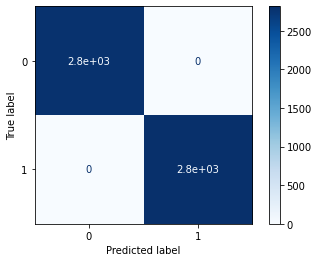

accuracy:
[1.         0.99964298 1.         1.         1.         1.
 1.         1.         1.         0.99928571]
0.9998928698934053
precision:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0
recall:
[1.         0.99928622 1.         1.         1.         1.
 1.         1.         1.         0.99857143]
0.9997857652697053
f1:
[1.         0.99964298 1.         1.         1.         1.
 1.         1.         1.         0.9992852 ]
0.999892818836528
--------
matriz de confusion:
TN=2785, FP=0 
FN=0, TP=2816 
--------
matriz de confusion %:
TN=49.723263702910195, FP=0.0 
FN=0.0, TP=50.276736297089805 
--------
accuracy1=1.0
--------
reca1=1.0
--------
pre1=1.0
--------
f1score=1.0


In [ ]:
# version with multi scroring mejorada
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix

start1 = time.time()
#model = RandomForestClassifier(random_state=1)
model = RandomForestClassifier(n_estimators=100)

#GH
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
#GH

cv = cross_validate(model, X2, y, cv=10)
#recall_score=cross_validation.cross_val_score(clf, X,y, cv=10, scoring ='recall')
#recall_score=cross_val_score(model, X,y, cv=10, scoring ='recall')

#scoring = ['neg_mean_absolute_error','r2']

scores=cross_validate(model, X2,y, cv=10, scoring = ['accuracy','f1','recall','precision'],return_train_score=False)
#recall_score=cross_validate(model, X,y, cv=10, scoring ='recall')
#pre_score=cross_validate(model, X,y, cv=10, scoring ='precision_macro')
print(confusion_matrix(y_test,y_pred))

print(f"multi_metric_scores:")
#print(scores['test_score'])
print(scores)
#print(scores['test_score'].mean())

#print(scores.mean())

#print(f"precision_macro_score:")
#print(pre_score['test_score'])
#print(pre_score['test_score'].mean())

#print(f"test_score:")
#print(cv['test_score'])
#print(cv['test_score'].mean())

#print(f"recall:")
#print(recall_score['test_score'])
#print(recall_score['test_score'].mean())

#print(f"f1score:")
#print(f1['test_score'])
#print(f1['test_score'].mean())

stop1 = time.time()
print(f"Training time: {stop1 - start1}s")

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#plot_confusion_matrix(clf, X_test, y_test)  
# plot_confusion_matrix(clf, X_test, y_test)  
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  

plt.show()

gh4 = scores.get("test_accuracy")

print(f"accuracy:")
print(gh4)
print(gh4.mean())

gh3 = scores.get("test_precision")

print(f"precision:")
print(gh3)
print(gh3.mean())

gh = scores.get("test_recall")

print(f"recall:")
print(gh)
print(gh.mean())

gh2 = scores.get("test_f1")

print(f"f1:")
print(gh2)
print(gh2.mean())

CM = confusion_matrix(y_test, y_pred)
print(f"--------")
print(f"matriz de confusion:")
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
print(f"TN={TN}, FP={FP} ")
print(f"FN={FN}, TP={TP} ")

print(f"--------")
print(f"matriz de confusion %:")
total1=(TN+TP+FN+FP)

print(f"TN={100*TN/total1}, FP={100*FP/total1} ")
print(f"FN={100*FN/total1}, TP={100*TP/total1} ")

print(f"--------")
acc1=(TN+TP)/(TN+TP+FN+FP)
print(f"accuracy1={acc1}")

print(f"--------")
re1=(TP)/(TP+FN)
print(f"reca1={re1}")

print(f"--------")
pre1=(TP)/(TP+FP)
print(f"pre1={pre1}")

print(f"--------")
f1s1=(2*pre1*re1)/(pre1+re1)
print(f"f1score={f1s1}")



In [ ]:
from scipy import stats

#stats.ttest_rel(df['bp_before'], df['bp_after'])
stats.ttest_rel(gh4, gh3)
#stats.ttest_rel(gh2, gh)

Ttest_relResult(statistic=-1.4054822401941298, pvalue=0.1934455436174361)

No handles with labels found to put in legend.


s50    0.331783576319425
s28    0.164916906695706
s26    0.159915598917073
s25    0.137043558569975
s44    0.092036586537369
s22    0.078737795254665
s31    0.018374022001212
s51    0.010338762695317
s27    0.005402614533553
s14    0.001450578475704
dtype: float64


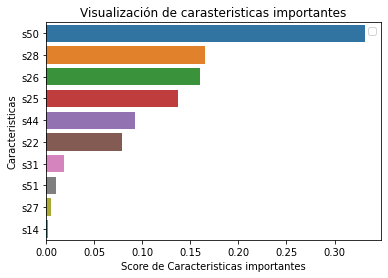

<Figure size 432x288 with 0 Axes>

In [ ]:

import pandas as pd
#feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
#feature_imp = pd.Series(clf.feature_importances_,index=X.columns[1:8]).sort_values(ascending=False)
feature_imp2 = pd.Series(clf.feature_importances_,index=X2.columns[0:24]).sort_values(ascending=False)

#feature_imp2 = pd.Series(clf.feature_importances_,index=X2.columns).sort_values(ascending=False)
print(feature_imp2)
#print(feature_imp2)

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp2, y=feature_imp2.index)
# Add labels to your graph
#plt.xlabel('Feature Importance Score')
plt.xlabel('Score de Caracteristicas importantes')
#plt.ylabel('Features')
plt.ylabel('Caracteristicas')
#plt.title("Visualizing Important Features")
plt.title("Visualización de carasteristicas importantes")
plt.legend()
plt.show()

#plt.savefig('destination_path.eps', format='eps' , dpi=1000)

plt.savefig('myimage.svg', format='svg', dpi=1200)

In [ ]:
# doble plot
# https://matplotlib.org/gallery/subplots_axes_and_figures/subplots_demo.html

In [ ]:
# n_estimators=500)
#X3=sensor[['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03','sensor_04', 'sensor_11', 'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20','sensor_21', 'sensor_22', 'sensor_23', 'sensor_25', 'sensor_26','sensor_27', 'sensor_28', 'sensor_30', 'sensor_31', 'sensor_44','sensor_50', 'sensor_51']]  # Features
X3=sensor[['sensor_50','sensor_28', 'sensor_26', 'sensor_25', 'sensor_44', 'sensor_31','sensor_22', 'sensor_27', 'sensor_51','sensor_20']] 
#y=sensor['target']  # Labels
X3= X3.rename(columns = {'sensor_50': 's50', 'sensor_44': 's44', 'sensor_28': 's28', 'sensor_31': 's31', 'sensor_26': 's26', 'sensor_25': 's25', 'sensor_51': 's51', 'sensor_27': 's27', 'sensor_19': 's19', 'sensor_20': 's20'}, inplace = False)
X3= X3.rename(columns = {'sensor_22': 's22', 'sensor_14': 's14'}, inplace = False)
y=sensor['machine_status']  # Labels

# Split dataset into training set and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.2) # 80% training and 20% test


from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=500)

start = time.time()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

stop = time.time()
print(f"Training time: {stop - start}s")

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#predicciones del item 17156 q es 1
#clf.predict([[0.0,53.55902,52.77777,43.402774810790994,204.72509765625,3.7302410000000004,404.9974,450.2004,454.0266,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

Training time: 10.027456045150757s
Accuracy: 1.0


In [ ]:
start1 = time.time()
model = RandomForestClassifier(random_state=1)
cv = cross_validate(model, X3, y, cv=10)
print(cv['test_score'])
print(cv['test_score'].mean())
stop1 = time.time()
print(f"Training time: {stop1 - start1}s")

[1.         0.99964298 1.         1.         1.         1.
 1.         1.         1.         0.99214286]
0.9991785841791196
Training time: 21.957491397857666s


[[2820    0]
 [   0 2781]]
[1.         0.99964298 1.         1.         1.         1.
 1.         1.         1.         0.99892857]
0.9998571556076911
Training time: 110.38733720779419s
[[2820    0]
 [   0 2781]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2820
           1       1.00      1.00      1.00      2781

    accuracy                           1.00      5601
   macro avg       1.00      1.00      1.00      5601
weighted avg       1.00      1.00      1.00      5601



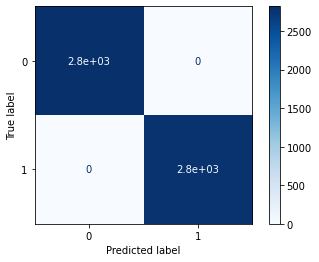

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix

start1 = time.time()
#model = RandomForestClassifier(random_state=1)
model = RandomForestClassifier(n_estimators=500)

cv = cross_validate(model, X3, y, cv=10)
print(confusion_matrix(y_test,y_pred))
print(cv['test_score'])
print(cv['test_score'].mean())
stop1 = time.time()
print(f"Training time: {stop1 - start1}s")

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#plot_confusion_matrix(clf, X_test, y_test)  
# plot_confusion_matrix(clf, X_test, y_test)  
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  

plt.show()

[[2820    0]
 [   0 2781]]
multi_metric_scores:
{'fit_time': array([10.17055106, 10.27183318, 10.8692565 , 10.50330186, 10.26805496,
       10.74668527, 10.89880562, 10.81330132, 10.87387753, 10.35521698]), 'score_time': array([0.10501933, 0.10190964, 0.11175323, 0.10794592, 0.11623073,
       0.10432959, 0.10426211, 0.10720825, 0.10558581, 0.10331106]), 'test_accuracy': array([1.        , 0.99964298, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99892857]), 'test_f1': array([1.        , 0.99964298, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99892819]), 'test_recall': array([1.        , 0.99928622, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99857143]), 'test_precision': array([1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
       1.       , 1.       , 1.       , 0.9992852])}
Training time: 224.7085771560669s
[[2820    0]
 

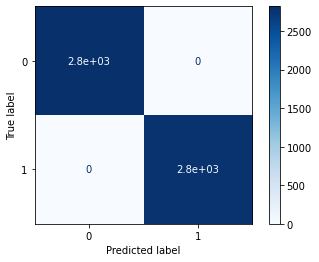

accuracy:
[1.         0.99964298 1.         1.         1.         1.
 1.         1.         1.         0.99892857]
0.9998571556076911
precision:
[1.        1.        1.        1.        1.        1.        1.
 1.        1.        0.9992852]
0.9999285203716941
recall:
[1.         0.99928622 1.         1.         1.         1.
 1.         1.         1.         0.99857143]
0.9997857652697053
f1:
[1.         0.99964298 1.         1.         1.         1.
 1.         1.         1.         0.99892819]
0.999857117328714
--------
matriz de confusion:
TN=2820, FP=0 
FN=0, TP=2781 
--------
matriz de confusion %:
TN=50.34815211569363, FP=0.0 
FN=0.0, TP=49.65184788430637 
--------
accuracy1=1.0
--------
reca1=1.0
--------
pre1=1.0
--------
f1score=1.0


In [ ]:
# version with multi scroring mejorada
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix

start1 = time.time()
#model = RandomForestClassifier(random_state=1)
model = RandomForestClassifier(n_estimators=500)

#GH
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
#GH

cv = cross_validate(model, X3, y, cv=10)
#recall_score=cross_validation.cross_val_score(clf, X,y, cv=10, scoring ='recall')
#recall_score=cross_val_score(model, X,y, cv=10, scoring ='recall')

#scoring = ['neg_mean_absolute_error','r2']

scores=cross_validate(model, X3,y, cv=10, scoring = ['accuracy','f1','recall','precision'],return_train_score=False)
#recall_score=cross_validate(model, X,y, cv=10, scoring ='recall')
#pre_score=cross_validate(model, X,y, cv=10, scoring ='precision_macro')
print(confusion_matrix(y_test,y_pred))

print(f"multi_metric_scores:")
#print(scores['test_score'])
print(scores)
#print(scores['test_score'].mean())

#print(scores.mean())

#print(f"precision_macro_score:")
#print(pre_score['test_score'])
#print(pre_score['test_score'].mean())

#print(f"test_score:")
#print(cv['test_score'])
#print(cv['test_score'].mean())

#print(f"recall:")
#print(recall_score['test_score'])
#print(recall_score['test_score'].mean())

#print(f"f1score:")
#print(f1['test_score'])
#print(f1['test_score'].mean())

stop1 = time.time()
print(f"Training time: {stop1 - start1}s")

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#plot_confusion_matrix(clf, X_test, y_test)  
# plot_confusion_matrix(clf, X_test, y_test)  
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  

plt.show()

gh4 = scores.get("test_accuracy")

print(f"accuracy:")
print(gh4)
print(gh4.mean())

gh3 = scores.get("test_precision")

print(f"precision:")
print(gh3)
print(gh3.mean())

gh = scores.get("test_recall")

print(f"recall:")
print(gh)
print(gh.mean())

gh2 = scores.get("test_f1")

print(f"f1:")
print(gh2)
print(gh2.mean())

CM = confusion_matrix(y_test, y_pred)
print(f"--------")
print(f"matriz de confusion:")
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
print(f"TN={TN}, FP={FP} ")
print(f"FN={FN}, TP={TP} ")

print(f"--------")
print(f"matriz de confusion %:")
total1=(TN+TP+FN+FP)

print(f"TN={100*TN/total1}, FP={100*FP/total1} ")
print(f"FN={100*FN/total1}, TP={100*TP/total1} ")

print(f"--------")
acc1=(TN+TP)/(TN+TP+FN+FP)
print(f"accuracy1={acc1}")

print(f"--------")
re1=(TP)/(TP+FN)
print(f"reca1={re1}")

print(f"--------")
pre1=(TP)/(TP+FP)
print(f"pre1={pre1}")

print(f"--------")
f1s1=(2*pre1*re1)/(pre1+re1)
print(f"f1score={f1s1}")

No handles with labels found to put in legend.


s50    0.393070120036386
s28    0.212628691091245
s26    0.132563063278011
s25    0.104254266104868
s44    0.088812765842395
s22    0.029298725806180
s31    0.017683349388846
s27    0.013719661096821
s51    0.007182280001457
s20    0.000787077353790
dtype: float64


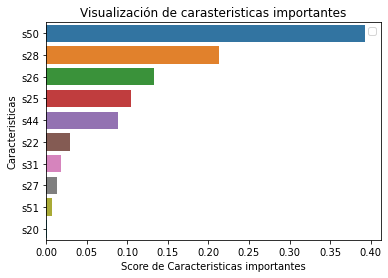

<Figure size 432x288 with 0 Axes>

In [ ]:
import pandas as pd
#feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
#feature_imp = pd.Series(clf.feature_importances_,index=X.columns[1:8]).sort_values(ascending=False)
feature_imp3 = pd.Series(clf.feature_importances_,index=X3.columns).sort_values(ascending=False)
print(feature_imp3)

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp3, y=feature_imp3.index)
# Add labels to your graph
#plt.xlabel('Feature Importance Score')
plt.xlabel('Score de Caracteristicas importantes')
#plt.ylabel('Features')
plt.ylabel('Caracteristicas')
#plt.title("Visualizing Important Features")
plt.title("Visualización de carasteristicas importantes")
plt.legend()
plt.show()

#plt.savefig('destination_path.eps', format='eps' , dpi=1000)

plt.savefig('myimage.svg', format='svg', dpi=1200)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  import sys


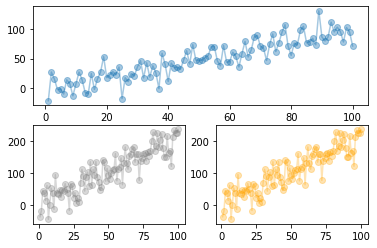

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
df=pd.DataFrame({'x': range(1,101), 'y': np.random.randn(100)*15+range(1,101), 'z': (np.random.randn(100)*15+range(1,101))*2 })
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
#ax1.plot( 'x', 'y', marker='o', alpha=0.4)
ax1.plot( 'x', 'y', data=df, marker='o', alpha=0.4)
ax2 = plt.subplot2grid((2, 2), (1, 0), colspan=1)
ax2.plot( 'x','z', data=df, marker='o', color="grey", alpha=0.3)
ax3 = plt.subplot2grid((2, 2), (1, 1), colspan=1)
ax3.plot( 'x','z', data=df, marker='o', color="orange", alpha=0.3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format s

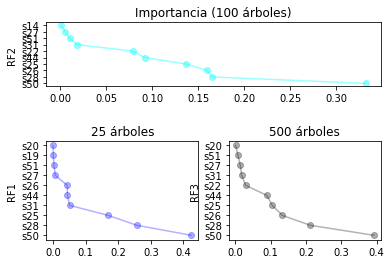

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
df=pd.DataFrame({'x': range(1,101), 'y': np.random.randn(100)*15+range(1,101), 'z': (np.random.randn(100)*15+range(1,101))*2 })
# n 25
df1=pd.DataFrame({'x': feature_imp, 'y': feature_imp.index})
# n 100
df2=pd.DataFrame({'x': feature_imp2, 'y': feature_imp2.index})
# n 500
df3=pd.DataFrame({'x': feature_imp3, 'y': feature_imp3.index})
plt.ylabel('ylabel', fontsize=6)
#ax1.ylabel('ylabel', fontsize=6)
#plt.yticks(fontsize=6)
plt.yticks(fontsize=6)
#ax1.yticks=[1, 2, 3]
#ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=2)
#ax1.plot( x1, y1, data=df, marker='o', alpha=0.4)
ax1.set_title('Importancia (100 árboles)')
#ax1.set(xlabel='x-label', ylabel='RF1')
ax1.set( ylabel='RF2')
#ax1.plot( 'x','y',data=df2, marker='o', alpha=0.4)
ax1.plot( 'x','y',data=df2, marker='o' , color="cyan" , alpha=0.4)
ax2 = plt.subplot2grid((2, 2), (1, 0), colspan=1)
#ax2.plot( 'x','z', data=df, marker='o', color="grey", alpha=0.3)
ax2.set_title('25 árboles')
ax2.set( ylabel='RF1')
#ax2.plot( 'x','y', data=df1, marker='o', color="grey", alpha=0.3)
ax2.plot( 'x','y', data=df1, marker='o', color="blue", alpha=0.3)
ax3 = plt.subplot2grid((2, 2), (1, 1), colspan=1)
#ax3.plot( 'x','z', data=df, marker='o', color="orange", alpha=0.3)
#ax3.plot( 'x','z', data=df3, marker='o', color="orange", alpha=0.3)
ax3.set_title('500 árboles')
ax3.set( ylabel='RF3')
#ax3.label_outer()
ax3.plot( 'x','y', data=df3, marker='o', color="black", alpha=0.3)
#ax3.plot( 'x','y', data=df3, marker='o', color="navy", alpha=0.3)
plt.savefig('filename.png', dpi=1200)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format s

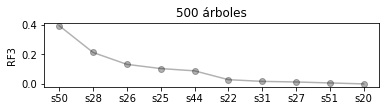

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
df=pd.DataFrame({'x': range(1,101), 'y': np.random.randn(100)*15+range(1,101), 'z': (np.random.randn(100)*15+range(1,101))*2 })
# n 25
df1=pd.DataFrame({'y': feature_imp, 'x': feature_imp.index})
# n 100
df2=pd.DataFrame({'y': feature_imp2, 'x': feature_imp2.index})
# n 500
df3=pd.DataFrame({'y': feature_imp3, 'x': feature_imp3.index})
plt.ylabel('ylabel', fontsize=6)
#ax1.ylabel('ylabel', fontsize=6)
#plt.yticks(fontsize=6)
plt.yticks(fontsize=6)
#ax1.yticks=[1, 2, 3]
#ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
ax1 = plt.subplot2grid((1, 1), (0, 0), rowspan=1)
#ax1.plot( x1, y1, data=df, marker='o', alpha=0.4)
ax1.set_title('sensores ó caracteristicas')
#ax1.set(xlabel='x-label', ylabel='RF1')
ax1.set( ylabel='RF2(importancia)')
#ax1.plot( 'x','y',data=df2, marker='o', alpha=0.4)
ax1.plot( 'x','y',data=df2, marker='o' , color="cyan" , alpha=0.4)
ax2 = plt.subplot2grid((2, 1), (0, 0), rowspan=1)
#ax2.plot( 'x','z', data=df, marker='o', color="grey", alpha=0.3)
ax2.set_title('25 árboles')
ax2.set( ylabel='RF1(importancia)')
#ax2.plot( 'x','y', data=df1, marker='o', color="grey", alpha=0.3)
ax2.plot( 'x','y', data=df1, marker='o', color="blue", alpha=0.3)
ax3 = plt.subplot2grid((3, 1), (0, 0), rowspan=1)
#ax3.plot( 'x','z', data=df, marker='o', color="orange", alpha=0.3)
#ax3.plot( 'x','z', data=df3, marker='o', color="orange", alpha=0.3)
ax3.set_title('500 árboles')
ax3.set( ylabel='RF3')
#ax3.label_outer()
ax3.plot( 'x','y', data=df3, marker='o', color="black", alpha=0.3)
#ax3.plot( 'x','y', data=df3, marker='o', color="navy", alpha=0.3)
plt.savefig('filename.png', dpi=1200)


In [ ]:
 x=feature_imp.index
 y=feature_imp
 x2=feature_imp2.index
 y2=feature_imp2
 x3=feature_imp3.index
 y3=feature_imp3

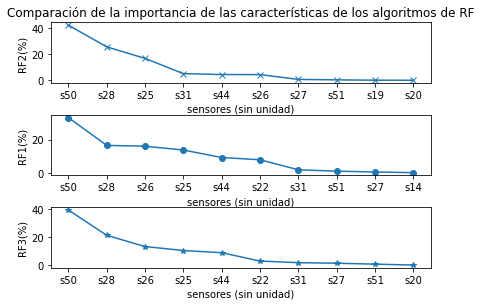

In [ ]:
#https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html
fig, (ax1, ax2, ax3) = plt.subplots(3)
plt.tight_layout()
#fig.title('Importancia()')
#fig.suptitle('Importancia()')
ax1.title.set_text('Comparación de la importancia de las características de los algoritmos de RF')
ax1.set( ylabel='RF2(%)', xlabel='sensores (sin unidad)')
#ax1.plot(x, y*100)
ax1.plot(x, y*100, marker='x')
# ax2.set_title('Importancia()')
ax2.set( ylabel='RF1(%)', xlabel='sensores (sin unidad)')
ax2.plot(x2, y2*100, marker='o')
# ax3.set_title('Importancia()')
ax3.set( ylabel='RF3(%)', xlabel='sensores (sin unidad)')
#ax3.plot(x3, y3*100)
ax3.plot(x3, y3*100, marker='*')


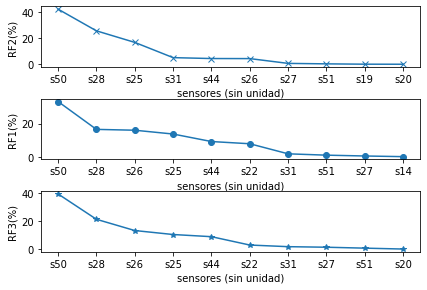

In [ ]:
#https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html
fig, (ax1, ax2, ax3) = plt.subplots(3)
plt.tight_layout()
#fig.title('Importancia()')
#fig.suptitle('Importancia()')
#ax1.title.set_text('Comparación de la importancia de las características de los algoritmos de RF')
ax1.set( ylabel='RF2(%)', xlabel='sensores (sin unidad)')
#ax1.plot(x, y*100)
ax1.plot(x, y*100, marker='x')
# ax2.set_title('Importancia()')
ax2.set( ylabel='RF1(%)', xlabel='sensores (sin unidad)')
ax2.plot(x2, y2*100, marker='o')
# ax3.set_title('Importancia()')
ax3.set( ylabel='RF3(%)', xlabel='sensores (sin unidad)')
#ax3.plot(x3, y3*100)
ax3.plot(x3, y3*100, marker='*')
plt.savefig('juntasMejordescripcion.png', dpi=1200)


In [ ]:
#fig, axs = plt.subplots(1, 3)
#axs[0, 0].plot(x, y)
#axs[0, 0].plot(feature_imp2, feature_imp2.index)
#axs[0, 0].set_title("main")
#axs[1, 0].plot(x, y**2)
#axs[1, 0].plot(feature_imp, feature_imp.index)
#axs[1, 0].set_title("shares x with main")
#axs[1, 0].sharex(axs[0, 0])
#axs[0, 1].plot(x + 1, y + 1)
#axs[0, 1].plot(feature_imp, feature_imp.index)
#axs[1, 0].plot(feature_imp, feature_imp)
#axs[0, 1].set_title("unrelated")
#axs[1, 1].plot(x + 2, y + 2)
#axs[1, 3].plot(x + 2, y + 2)
#axs[1, 1].set_title("also unrelated")
#axs[1, 3].set_title("also unrelated")
#fig.tight_layout()

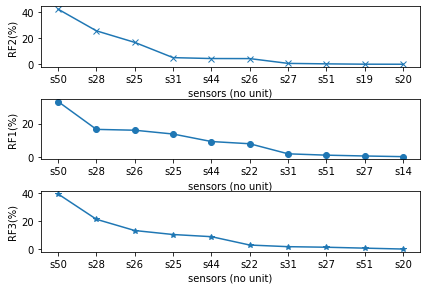

In [ ]:
#https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html
fig, (ax1, ax2, ax3) = plt.subplots(3)
plt.tight_layout()
#fig.title('Importancia()')
#fig.suptitle('Importancia()')
#ax1.title.set_text('Comparación de la importancia de las características de los algoritmos de RF')
ax1.set( ylabel='RF2(%)', xlabel='sensors (no unit)')
#ax1.plot(x, y*100)
ax1.plot(x, y*100, marker='x')
# ax2.set_title('Importancia()')
ax2.set( ylabel='RF1(%)', xlabel='sensors (no unit)')
ax2.plot(x2, y2*100, marker='o')
# ax3.set_title('Importancia()')
ax3.set( ylabel='RF3(%)', xlabel='sensors (no unit)')
#ax3.plot(x3, y3*100)
ax3.plot(x3, y3*100, marker='*')
plt.savefig('juntasMejordescripcion.png', dpi=1200)


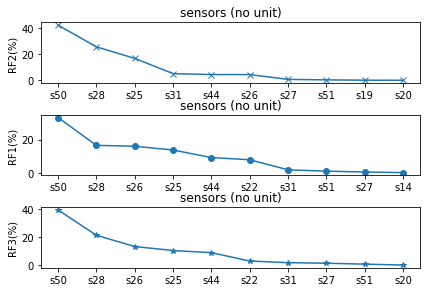

In [ ]:
#https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html
fig, (ax1, ax2, ax3) = plt.subplots(3)
plt.tight_layout()
#fig.title('Importancia()')
#fig.suptitle('Importancia()')
#ax1.title.set_text('Comparación de la importancia de las características de los algoritmos de RF')
#ax1.set( ylabel='RF2(%)', xlabel='sensors (no unit)')
ax1.set( ylabel='RF2(%)')
ax1.set_title('sensors (no unit)')
#ax1.plot(x, y*100)
ax1.plot(x, y*100, marker='x')
# ax2.set_title('Importancia()')
#ax2.set( ylabel='RF1(%)', xlabel='sensors (no unit)')
ax2.set( ylabel='RF1(%)')
ax2.set_title('sensors (no unit)')
ax2.plot(x2, y2*100, marker='o')
# ax3.set_title('Importancia()')
#ax3.set( ylabel='RF3(%)', xlabel='sensors (no unit)')
ax3.set( ylabel='RF3(%)')
ax3.set_title('sensors (no unit)')
#ax3.plot(x3, y3*100)
ax3.plot(x3, y3*100, marker='*')
plt.savefig('juntasMejordescripcion77.png', dpi=1200)

#for ax in fig.get_axes():
#    ax.label_outer()
